In [50]:
import sys
import os

project_root = os.path.abspath('../..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

plt.style.use('ggplot')

%config InlineBackend.figure_formats = ['svg']


from catan.core import Game
from catan.core.models.player import RandomPlayer, Color, Player

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Measure win rates

In [145]:

def playout(players):
    game = Game(players=players)
    game.play()
    
    return game.state.num_turns

def n_playout_steps(players, n_playouts):
    return [playout(players) for _ in range(n_playouts)]

    
n_games = 500
steps_by_player = [
    n_playout_steps([RandomPlayer(color=Color.BLUE), ], n_games),
    n_playout_steps([RandomPlayer(color=Color.BLUE), RandomPlayer(color=Color.RED)], n_games),
    n_playout_steps([RandomPlayer(color=Color.BLUE), RandomPlayer(color=Color.RED), RandomPlayer(color=Color.ORANGE)], n_games),
    n_playout_steps([RandomPlayer(color=Color.BLUE), RandomPlayer(color=Color.WHITE), RandomPlayer(color=Color.RED), RandomPlayer(color=Color.ORANGE)], n_games),
]


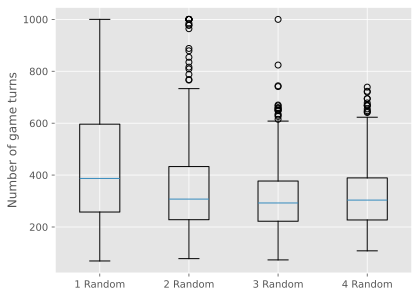

In [146]:
labels = ['1 Random', '2 Random', '3 Random', '4 Random']

fig, ax = plt.subplots()
ax.set_ylabel('Number of game turns')

bplot = ax.boxplot(
    steps_by_player,
    tick_labels=labels
)
ax.grid(visible=True)


plt.show()

### MCTS scheme

TODO
- Prune building settlements from initial steps, pick only the most promising ones